In [1]:
import pandas as pd
df=pd.read_csv("D:\\csss\\coin_Aave.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        275 non-null    int64  
 1   Name       275 non-null    object 
 2   Symbol     275 non-null    object 
 3   Date       275 non-null    object 
 4   High       275 non-null    float64
 5   Low        275 non-null    float64
 6   Open       275 non-null    float64
 7   Close      275 non-null    float64
 8   Volume     275 non-null    float64
 9   Marketcap  275 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 21.6+ KB


In [3]:
print(df.isna().sum())

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64


In [5]:
import pandas as pd

# Fill missing values in Volume with the median
df['Volume'] = df['Volume'].fillna(df['Volume'].median())

# Fill missing values in Market Cap with the median
df['Market Cap'] = df['Market Cap'].fillna(df['Market Cap'].median())

# Display the updated DataFrame
print(df)
# Fill missing values in Volume with mode
df['Volume'] = df['Volume'].fillna(df['Volume'].mode()[0])

# Fill missing values in Market Cap with mode
df['Market Cap'] = df['Market Cap'].fillna(df['Market Cap'].mode()[0])


# Display the updated DataFrame
print(df)
print(df.isna().sum())
# Fill missing values with mode instead of median
#df['Volume'].fillna(df['Volume'].mode()[0], inplace=True)
#df['Market Cap'].fillna(df['Market Cap'].mode()[0], inplace=True)


KeyError: 'Market Cap'

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.describe()

In [ ]:
pip install matplotlib seaborn


# outliers view

KeyError: 'Market Cap'

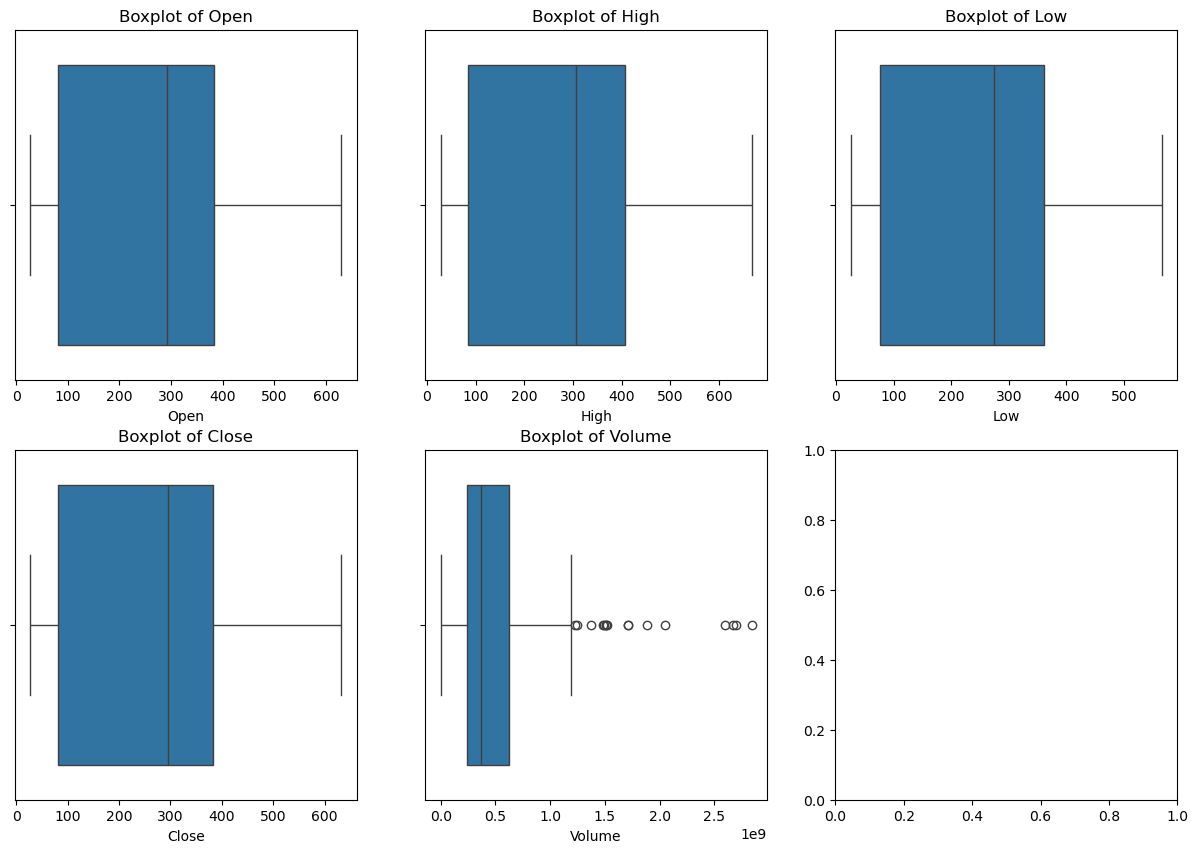

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# List of columns to plot boxplots for (excluding 'Unnamed: 0')
columns_to_plot = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']

# Set the size of the figure
plt.figure(figsize=(15, 10))

# Create a boxplot for each column
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # Create a grid of 2 rows and 3 columns
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Calculate Q1, Q3, and IQR for the columns of interest
Q1 = df[['Volume', 'Marketcap']].quantile(0.25)
Q3 = df[['Volume', 'Marketcap']].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[~((df[['Volume', 'Marketcap']] < lower_bound) | 
                       (df[['Volume', 'Marketcap']] > upper_bound)).any(axis=1)]

# Display the cleaned DataFrame
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)

In [ ]:
features = ['SNo','Name','Date','High','Low','Close','Volume']
target = 'Marketcap'

# Drop rows with missing values in features or target
df_filtered = df.dropna(subset=features + [target])
Q1 = df_filtered[target].quantile(0.25)
Q3 = df_filtered[target].quantile(0.75)
IQR = Q3 - Q1

# Define the acceptable range for price_usd
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered_no_price_outliers = df_filtered[(df_filtered[target] >= lower_bound) & (df_filtered[target] <= upper_bound)]

# Check how many rows remain after outlier removal
print(f"Rows before outlier removal: {df_filtered.shape[0]}")
print(f"Rows after removing price_usd outliers: {df_filtered_no_price_outliers.shape[0]}")


In [ ]:
import pandas as pd
from scipy import stats
import numpy as np

# List of numeric columns you want to calculate Z-scores for
features = ['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']

# Convert relevant columns to numeric just in case there are any unexpected data types
df_filtered[features] = df_filtered[features].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values (if any) after conversion
df_filtered = df_filtered.dropna(subset=features)

# Calculate Z-scores for the selected features
z_scores = np.abs(stats.zscore(df_filtered[features]))

# Keep only rows where all Z-scores are less than 3 (removing outliers)
df_filtered_no_outliers = df_filtered[(z_scores < 3).all(axis=1)]

# Print the number of remaining rows after removing outliers
print(f"Remaining rows after removing outliers: {len(df_filtered_no_outliers)}")

# Optionally, inspect the cleaned data
print(df_filtered_no_outliers.head())


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# List of columns to plot boxplots for (excluding 'Unnamed: 0')
columns_to_plot = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']

# Set the size of the figure
plt.figure(figsize=(15, 10))

# Create a boxplot for each column
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # Create a grid of 2 rows and 3 columns
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
# heat map
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df_filtered_no_outliers[features + [target]].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features and Price')
plt.show()


In [ ]:
# liner reggression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Extract features and target
X = df_filtered_no_outliers[features]
y = df_filtered_no_outliers[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

plt.figure(figsize=(18,10))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import numpy as np

# Assuming df_filtered_no_outliers is your filtered DataFrame after removing outliers
# Make sure that the 'target' is numeric and features contain only numeric columns

# Define the feature columns
features = ['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']
target = 'Close'  # Adjust the target column to your actual target variable

# Ensure the feature columns are numeric
x = df_filtered_no_outliers[features].astype('float')
y = df_filtered_no_outliers[target].astype('float')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = svr.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

# Display formatted results
print(f"\n{'='*60}")
print(f"{'Support Vector Regression Results':^60}")
print(f"{'='*60}")
print(f"{'Mean Squared Error (MSE)':<35}: {mse:.2f}")
print(f"{'R² Score (R2)':<35}: {r2:.4f}")
print(f"{'Accuracy (%)':<35}: {accuracy:.2f}%")
print(f"{'='*60}\n")

# Create a DataFrame to compare actual vs predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Format the results_df for better presentation
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', None)

# Print a portion of the predictions
print(f"\nRESULT OF ALL PREDICTIONS:\n{'='*60}")
print(results_df.head().to_string(index=False))
print(f"\n{'='*60}")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Select relevant columns for features and target
features = ['Marketcap', 'Volume', 'Open', 'High', 'Low', 'Close']  # Replace with relevant columns
target = 'Close'  # Replace with relevant target column, e.g., Close price

# Drop rows with missing values in features or target
df_filtered_no_outliers = df_filtered_no_outliers.dropna(subset=features + [target])

# Extract features and target after removing outliers
X = df_filtered_no_outliers[features].astype('float')
y = df_filtered_no_outliers[target].astype('float')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the RandomForestRegressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test_scaled)

# Compute metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Print metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plotting predicted vs actual prices with a legend
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7, label='Predicted', color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3, label='Actual')

# Adding labels and title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest Regression: Actual vs Predicted Prices')

# Display legend
plt.legend()

# Show plot
plt.show()


In [ ]:
# Define your feature columns and target column
features = ['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']
target = 'Close'  # Assuming we are predicting the 'Close' price
X = df_filtered_no_outliers[features]
y = df_filtered_no_outliers[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Display results
print(f"Decision Tree Mean Squared Error (MSE): {mse_dt}")
print(f"Decision Tree R-squared (R²): {r2_dt}")
# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display results
print(f"Random Forest Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest R-squared (R²): {r2_rf}")


In [ ]:
# Initialize and train the Support Vector Regressor
svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

# Display results
print(f"SVM Mean Squared Error (MSE): {mse_svm}")
print(f"SVM R-squared (R²): {r2_svm}")


In [ ]:
# Display all results together
print(f"Decision Tree: MSE = {mse_dt}, R² = {r2_dt}")
print(f"Random Forest: MSE = {mse_rf}, R² = {r2_rf}")
print(f"SVM: MSE = {mse_svm}, R² = {r2_svm}")
print(f"{'Accuracy (%)':<35}: {accuracy:.2f}%")

# Plot actual vs predicted for the best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, label='Random Forest Predictions', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.legend()
plt.show()
# Assuming y_test and y_pred are already defined
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the results
print(results_df.head())


In [9]:
from sklearn.model_selection import cross_val_score

dt_regressor = DecisionTreeRegressor(max_depth=10)  # Example with max_depth

# Perform cross-validation
scores = cross_val_score(dt_regressor, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R2 Scores:", scores)
print("Mean CV R2 Score:", scores.mean())


NameError: name 'X_train' is not defined

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (assuming it's already cleaned and outliers have been removed)
df = pd.read_csv("D:\\csss\\coin_Aave.csv")
df.info()

# Remove outliers (This step is included in case it's needed again)
Q1 = df[['Volume', 'Marketcap']].quantile(0.25)
Q3 = df[['Volume', 'Marketcap']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[~((df[['Volume', 'Marketcap']] < lower_bound) | 
                       (df[['Volume', 'Marketcap']] > upper_bound)).any(axis=1)]

# Select features (X) and target (y)
X = df_no_outliers[['High', 'Low', 'Open', 'Volume', 'Marketcap']]  # Features
y = df_no_outliers['Close']  # Target variable (Close price)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVR model
svr = SVR(kernel='rbf')

# Train the model
svr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        275 non-null    int64  
 1   Name       275 non-null    object 
 2   Symbol     275 non-null    object 
 3   Date       275 non-null    object 
 4   High       275 non-null    float64
 5   Low        275 non-null    float64
 6   Open       275 non-null    float64
 7   Close      275 non-null    float64
 8   Volume     275 non-null    float64
 9   Marketcap  275 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 21.6+ KB
Mean Squared Error: 11595.88943417794
R-squared: 0.5556653191491935


In [13]:
import pandas as pd

# Example input data (user-provided) as a DataFrame
new_data = pd.DataFrame([[300, 270, 280, 500000000, 2000000000]], 
                        columns=['High', 'Low', 'Open', 'Volume', 'Marketcap'])

# Second example input data (user-provided) as a DataFrame
new_data1 = pd.DataFrame([[55.112358, 49.787900, 52.675035, 0.000000e+00, 8.912813e+07]], 
                         columns=['High', 'Low', 'Open', 'Volume', 'Marketcap'])

# Predict the price based on new data
predicted_price_1 = svr.predict(new_data)
predicted_price_2 = svr.predict(new_data1)

# Print the predicted prices
print(f'Predicted Cryptocurrency Price 1st time: {predicted_price_1[0]}')
print(f'Predicted Cryptocurrency Price 2nd time: {predicted_price_2[0]}')

# You can also store new inputs in a list
new_data_list = [[55.112358, 49.787900, 52.675035, 0.000000e+00, 8.912813e+07]]


Predicted Cryptocurrency Price 1st time: 221.58108416620303
Predicted Cryptocurrency Price 2nd time: 189.99112682818082


In [15]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (assuming it's already cleaned and outliers have been removed)
df = pd.read_csv("D:\\csss\\BTCjj.csv")
df.head(10)


,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Sep 18, 2024","60,316.38","60,716.77","59,982.21","60,365.13","60,365.13","39,28,29,99,296"
1,"Sep 17, 2024","58,192.51","61,316.09","57,628.07","60,308.54","60,308.54","38,07,55,70,118"
2,"Sep 16, 2024","59,185.23","59,205.51","57,501.34","58,192.51","58,192.51","32,03,28,22,113"
3,"Sep 15, 2024","60,000.73","60,381.92","58,696.31","59,182.84","59,182.84","18,12,09,60,867"
4,"Sep 14, 2024","60,569.12","60,656.72","59,517.88","60,005.12","60,005.12","16,42,84,05,496"
5,"Sep 13, 2024","58,130.32","60,648.02","57,650.11","60,571.30","60,571.30","32,49,05,28,356"
6,"Sep 12, 2024","57,343.17","58,534.36","57,330.10","58,127.01","58,127.01","33,83,57,07,949"
7,"Sep 11, 2024","57,650.29","57,991.32","55,567.34","57,343.17","57,343.17","37,04,90,62,672"
8,"Sep 10, 2024","57,020.10","58,029.98","56,419.41","57,648.71","57,648.71","28,85,76,30,507"
9,"Sep 09, 2024","54,851.89","58,041.13","54,598.43","57,019.54","57,019.54","34,61,80,96,173"


In [21]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for Bitcoin
ticker = "BTC-USD"

# Download historical data for Bitcoin
data = yf.download(ticker, start="2020-01-01", end="2024-01-01")

# Save the data to a CSV file
data.to_csv("bitcoin_historical_data.csv")

# View the data
print(data.head())


[*********************100%***********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-01  7194.892090  7254.330566  7174.944336  7200.174316  7200.174316   
2020-01-02  7202.551270  7212.155273  6935.270020  6985.470215  6985.470215   
2020-01-03  6984.428711  7413.715332  6914.996094  7344.884277  7344.884277   
2020-01-04  7345.375488  7427.385742  7309.514160  7410.656738  7410.656738   
2020-01-05  7410.451660  7544.497070  7400.535645  7411.317383  7411.317383   

                 Volume  
Date                     
2020-01-01  18565664997  
2020-01-02  20802083465  
2020-01-03  28111481032  
2020-01-04  18444271275  
2020-01-05  19725074095  


In [16]:
# List of columns to apply the IQR method
columns=['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']

# Function to remove outliers using IQR for multiple columns
def remove_outliers_iqr(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter the data for each column
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Apply the outlier removal function
df_filtered = remove_outliers_iqr(df, columns)

# Plot the data before and after outlier removal
def plot_data_before_after(df_original, df_filtered, column):
    plt.figure(figsize=(12, 6))
    
    # Original data
    plt.subplot(1, 2, 1)
    plt.plot(df_original['Date'], df_original[column], 'b-', label='Original Data')
    plt.title(f'{column} Before Outlier Removal')
    plt.xlabel('Date')
    plt.ylabel(column)
    
    # Filtered data
    plt.subplot(1, 2, 2)
    plt.plot(df_filtered['Date'], df_filtered[column], 'g-', label='Filtered Data')
    plt.title(f'{column} After Outlier Removal')
    plt.xlabel('Date')
    plt.ylabel(column)
    
    plt.tight_layout()
    plt.show()

# Plot graphs for each column before and after outlier removal
for col in columns:
    plot_data_before_after(df, df_filtered, col) = ['H


SyntaxError: unterminated string literal (detected at line 44) (348748859.py, line 44)